## 1 Exercise: Generate random data
### The idea is to learn how to generate random data following a gaussian distribution with different variances. Moreover we will generate a specific outlier in order to study how it affects a linear regression assuming different metrics.

[2.05128627 2.61774694 2.72600588 2.24705441 2.1739688  2.52064205
 2.96924717 2.3217595  2.35530538 2.77408599 2.25463649 2.91158421
 2.20441537 2.54837466 2.76265221 2.54651658 2.56661856 2.73188382
 2.84949893 5.        ]


(array([1., 3., 2., 1., 1., 4., 2., 2., 2., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([2.05128627, 2.14957672, 2.24786718, 2.34615764, 2.4444481 ,
        2.54273856, 2.64102901, 2.73931947, 2.83760993, 2.93590039,
        3.03419084, 3.1324813 , 3.23077176, 3.32906222, 3.42735268,
        3.52564313, 3.62393359, 3.72222405, 3.82051451, 3.91880496,
        4.01709542, 4.11538588, 4.21367634, 4.3119668 , 4.41025725,
        4.50854771, 4.60683817, 4.70512863, 4.80341908, 4.90170954,
        5.        ]),
 <BarContainer object of 30 artists>)

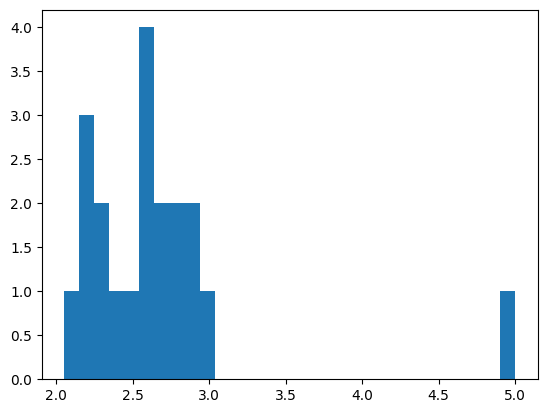

In [1]:
# 1) Generate an array array (with length=20) of standard deviations of random values following a uniform distribution 
# between 2 and 3. Fix the value of the last element = 5. The last point will be the outlier.

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt


std_array = np.random.uniform(2, 3, 20)
std_array[-1] = 5
print(std_array)

plt.hist(std_array, bins=30)

In [2]:
#2) Generate an array, std-array, of 20 values following a gaussian distribution with a standard deviation defined 
# by the array generated in the previous 1). Replace the last point by a value correponding to +2.5 \sigma (you have the outlier generation).

sta_gaussian_array = np.random.normal(0, std_array)
sta_gaussian_array[-1] = 2.5 * std_array[-1]

print(sta_gaussian_array)

[-3.48218294 -0.21761602 -4.92931958  3.64431134  0.03882367 -3.84277394
 -3.74849307  0.88456643 -2.29682947 -1.74260164 -2.61341759  2.20443014
  0.57517932 -2.01881579 -0.42513867 -1.26179401 -3.4906046  -1.85179279
 -2.3993767  12.5       ]


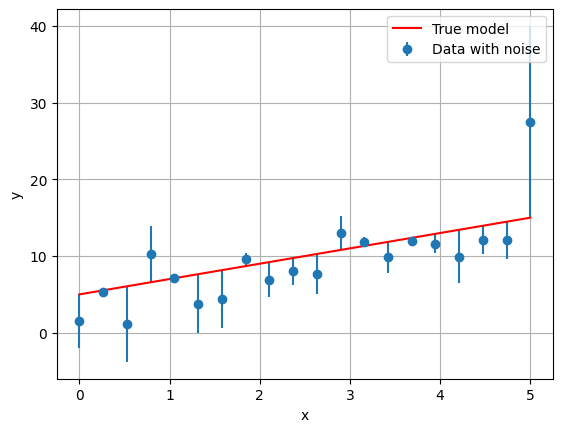

In [3]:
# 3) Generate an array of 20 values linearly spaced between 0 and 5 (your x-array)
x_array = np.linspace(0, 5, 20)


# 4) Generate the y-array to follow the relation y= a + bx + noise, wherre a=2, b=5 and 
#  noise corresponds to the  fluctuations you have generated in 2). 


def model(x, a, b):
    return a*x + b

true_model = model(x_array, 2, 5)
y_array = true_model + sta_gaussian_array


# 5) plot the data points

plt.errorbar(x_array, y_array, yerr=np.abs(sta_gaussian_array), fmt='o', label='Data with noise')
plt.plot(x_array, true_model, 'r-', label='True model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


### 1.2 Use gradient descent for finding best values of a and b

In [4]:
# 6) Create a function, L1-dist, that take in argument (params, x-array, y-array), where params will correspond
#to an array of 2 elements [a,b]. This function have to return the sum of the absolute differences between the
#model (params[0]*x-array + params[1]) and the y-array values. This function is evaluating the L1 metric
#distance between the y-array data points and the model for params values.


def L1_dist(params, x_array, y_array):
    a, b = params
    model_values = model(x_array, a, b)
    return np.sum(np.abs(model_values - y_array))


#Create a function, L2-dist, that take in argument (params, x-array, y-array), where params will correspond
#to an array of 2 elements [a,b]. This function have to return the sum of the square differences between the
#model (params[0]*x-array + params[1]) and the y-array values. This function is evaluating the L2 metric
#distance between the y-array data points and the model for params values.


def L2_dist(params, x_array, y_array):
    a, b = params
    model_values = model(x_array, a, b)
    return np.sum((model_values - y_array) ** 2)

# Create a function, Chi2-dist, that take in argument (params, x-array, y-array, std-array), where params will
#correspond to an array of 2 elements [a,b]. This function have to return the sum of the square differences
#between the model (params[0]*x-array + params[1]) and the y-array values, divided by the std-array at the
#square. This function is evaluating the χ2 metric distance between the y-array data points and the model  for params values.


def Chi2_dist(params, x_array, y_array, std_array):
    a, b = params
    model_values = model(x_array, a, b)
    return np.sum(((model_values - y_array) / std_array) ** 2)

In [5]:
# 7) Using the function scipy.optimize.minimize(), fins the best fit values of a and b for the 3 metrics.


L1_fit = opt.minimize(L1_dist, x0=[0, 0], args=(x_array, y_array))

L2_fit = opt.minimize(L2_dist, x0=[0, 0], args=(x_array, y_array))

Chi2_fit = opt.minimize(Chi2_dist, x0=[0, 0], args=(x_array, y_array, std_array))


print("L1 fit parameters: a = {:.3f}, b = {:.3f}".format(L1_fit.x[0], L1_fit.x[1]))
print("L2 fit parameters: a = {:.3f}, b = {:.3f}".format(L2_fit.x[0], L2_fit.x[1]))
print("Chi2 fit parameters: a = {:.3f}, b = {:.3f}".format(Chi2_fit.x[0], Chi2_fit.x[1]))


L1 fit parameters: a = 2.316, b = 2.289
L2 fit parameters: a = 2.742, b = 2.422
Chi2 fit parameters: a = 2.190, b = 3.417


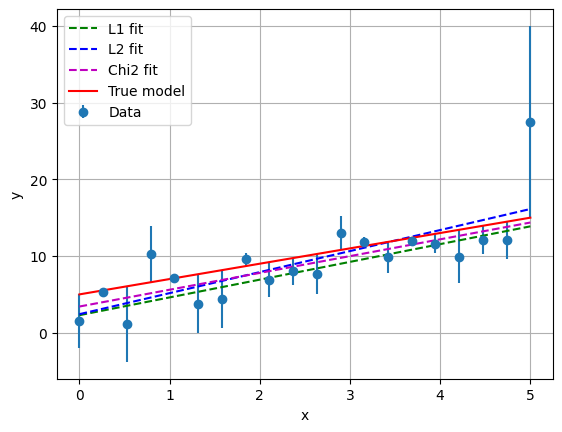

In [7]:
# 8) Do the same plot as for the question 5) adding the lines corresponding to the 3 best fits.

plt.errorbar(x_array, y_array, yerr=np.abs(sta_gaussian_array), fmt='o', label='Data')
plt.plot(x_array, model(x_array, L1_fit.x[0], L1_fit.x[1]), 'g--', label='L1 fit')
plt.plot(x_array, model(x_array, L2_fit.x[0], L2_fit.x[1]), 'b--', label='L2 fit')
plt.plot(x_array, model(x_array, Chi2_fit.x[0], Chi2_fit.x[1]), 'm--', label='Chi2 fit')
plt.plot(x_array, true_model, 'r-', label='True model')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc='upper left')
plt.show()
